### PROJECT FOR CUSTOMER SERVICE REQUEST ANALYSIS

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_file=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
customer_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460456 entries, 0 to 460455
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      460456 non-null  int64  
 1   Created Date                    460456 non-null  object 
 2   Closed Date                     457851 non-null  object 
 3   Agency                          460456 non-null  object 
 4   Agency Name                     460456 non-null  object 
 5   Complaint Type                  460455 non-null  object 
 6   Descriptor                      458143 non-null  object 
 7   Location Type                   367038 non-null  object 
 8   Incident Zip                    439542 non-null  object 
 9   Incident Address                388292 non-null  object 
 10  Street Name                     388281 non-null  object 
 11  Cross Street 1                  202483 non-null  object 
 12  Cross Street 2  

In [4]:
# Identifying the shape of data
customer_file.shape

(460456, 41)

In [5]:
customer_file.size

18878696

# Identifying The Number Of Null Values In Given Data

In [6]:
customer_file.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2605
Agency                                 0
Agency Name                            0
Complaint Type                         1
Descriptor                          2313
Location Type                      93418
Incident Zip                       20914
Incident Address                   72164
Street Name                        72175
Cross Street 1                    257973
Cross Street 2                    258645
Intersection Street 1             421011
Intersection Street 2             421037
Address Type                       20978
City                               20889
Landmark                          459815
Facility Type                     359318
Status                                 1
Due Date                          296810
Resolution Description             24375
Resolution Action Updated Date      8971
Community Board                       22
BBL             

In [7]:
customer_file.shape

(460456, 41)

In [ ]:
#Find the percentage of missing values in each column

In [8]:
round(customer_file.isnull().sum()/len(customer_file.index),1)*100

Unique Key                          0.0
Created Date                        0.0
Closed Date                         0.0
Agency                              0.0
Agency Name                         0.0
Complaint Type                      0.0
Descriptor                          0.0
Location Type                      20.0
Incident Zip                        0.0
Incident Address                   20.0
Street Name                        20.0
Cross Street 1                     60.0
Cross Street 2                     60.0
Intersection Street 1              90.0
Intersection Street 2              90.0
Address Type                        0.0
City                                0.0
Landmark                          100.0
Facility Type                      80.0
Status                              0.0
Due Date                           60.0
Resolution Description             10.0
Resolution Action Updated Date      0.0
Community Board                     0.0
BBL                                20.0


In [ ]:
#Remove all columns having 50% missing values

In [9]:
missing_columns=customer_file.columns[100*(customer_file.isnull().sum()/len(customer_file.index)) > 50]

In [10]:
print(missing_columns)

Index(['Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Landmark', 'Facility Type', 'Due Date',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment'],
      dtype='object')


In [11]:
customer_file=customer_file.drop(missing_columns,axis=1)

In [12]:
customer_file.shape

(460456, 27)

## Analyze The Date Column And Remove The Entries If It Has An Incorrect Timeline

In [13]:
customer_file['Created Date']=pd.to_datetime(customer_file['Created Date'])
customer_file['Closed Date']=pd.to_datetime(customer_file['Closed Date'])

In [17]:
customer_file['Request_Closing_Time']= customer_file['Closed Date'].values-customer_file['Created Date']
customer_file['Request_Closing_Time_mins']= customer_file['Request_Closing_Time']/np.timedelta64(1,'m')

In [18]:
#Check whether created date column has any null values
customer_file['Created Date'].isnull().sum()

0

In [19]:
#Checking whether closed date column has any null values
customer_file['Closed Date'].isnull().sum()

2605

In [ ]:
#To remove null values from closed date columns

In [21]:
customer_file.dropna(subset=['Closed Date'], inplace = True)

In [22]:
customer_file['Closed Date'].isnull().sum()

0

## Frequency Plot For City Wise Complaints

<AxesSubplot:title={'center':'Most Common Complaints'}>

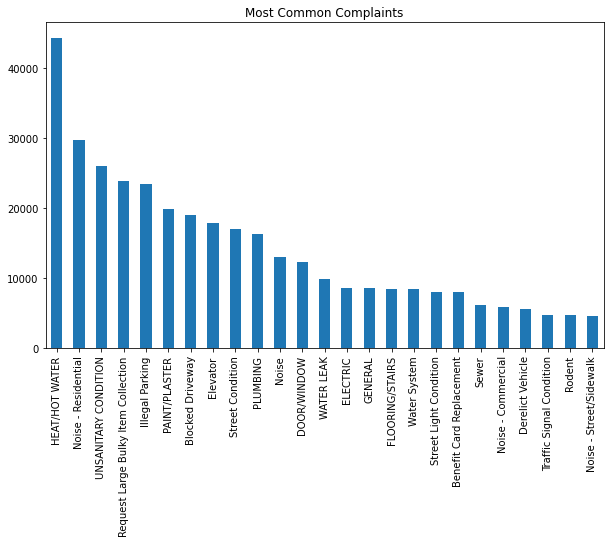

In [25]:
(customer_file['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Common Complaints')

## Scatter Plot And Hexbin Plot For Brooklyn

<AxesSubplot:title={'center':'Complaints Concentration in Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

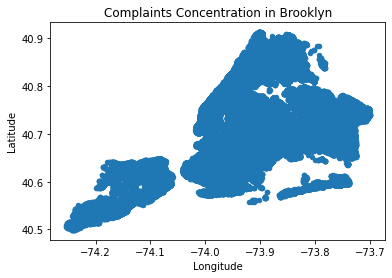

In [26]:
#Draw scatter plot for complaint concentration across Brooklyn
customer_file[['Longitude', 'Latitude']].plot(kind = 'scatter', x='Longitude', y='Latitude',
                    title ='Complaints Concentration in Brooklyn')

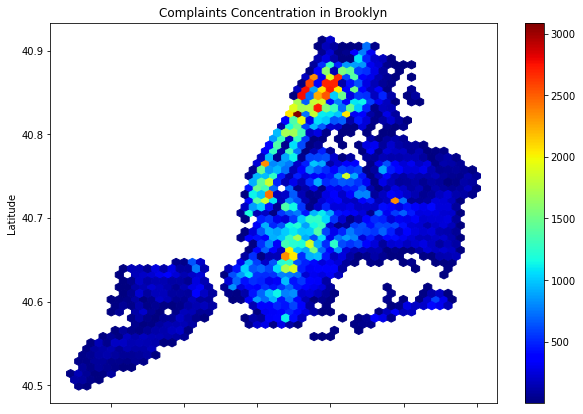

In [29]:
#Draw hexbin plot for complaint concentration across Brooklyn
customer_file[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', gridsize=50,
    colormap = 'jet', mincnt=1, title = 'Complaints Concentration in Brooklyn', figsize = (10, 7));

## Find The Major Types Of Complaints

In [30]:
#Display complaint type and city together
customer_file[['Complaint Type','City']]

,Complaint Type,City
0,Request Large Bulky Item Collection,Ozone Park
1,Request Large Bulky Item Collection,BROOKLYN
2,Noise,STATEN ISLAND
3,Noise,BROOKLYN
4,Request Large Bulky Item Collection,BROOKLYN
...,...,...
460451,UNSANITARY CONDITION,BROOKLYN
460452,PAINT/PLASTER,BRONX
460453,PLUMBING,BROOKLYN
460454,GENERAL,BRONX


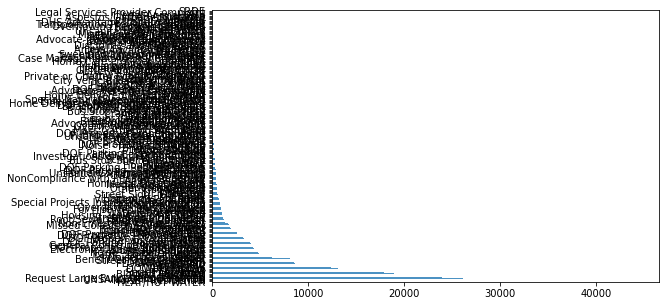

In [33]:
#Plot a bar graph of count vs complaint types
customer_file['Complaint Type'].value_counts().plot(kind='barh',alpha=0.8,figsize=(8,5))
plt.show()

In [34]:
#Find the top 10 complaint types
Top_10_complaints=customer_file['Complaint Type'].value_counts().nlargest(10)
print(Top_10_complaints)

HEAT/HOT WATER                         44349
Noise - Residential                    29800
UNSANITARY CONDITION                   26103
Request Large Bulky Item Collection    23926
Illegal Parking                        23431
PAINT/PLASTER                          19865
Blocked Driveway                       18978
Elevator                               17887
Street Condition                       17034
PLUMBING                               16295
Name: Complaint Type, dtype: int64


## Visualise The Major Types Of Complaints In Each City

In [35]:
da1=customer_file.groupby(['City','Complaint Type']).size().unstack().fillna(0)

Text(0.5, 1.0, 'Number of Complaints vs City')

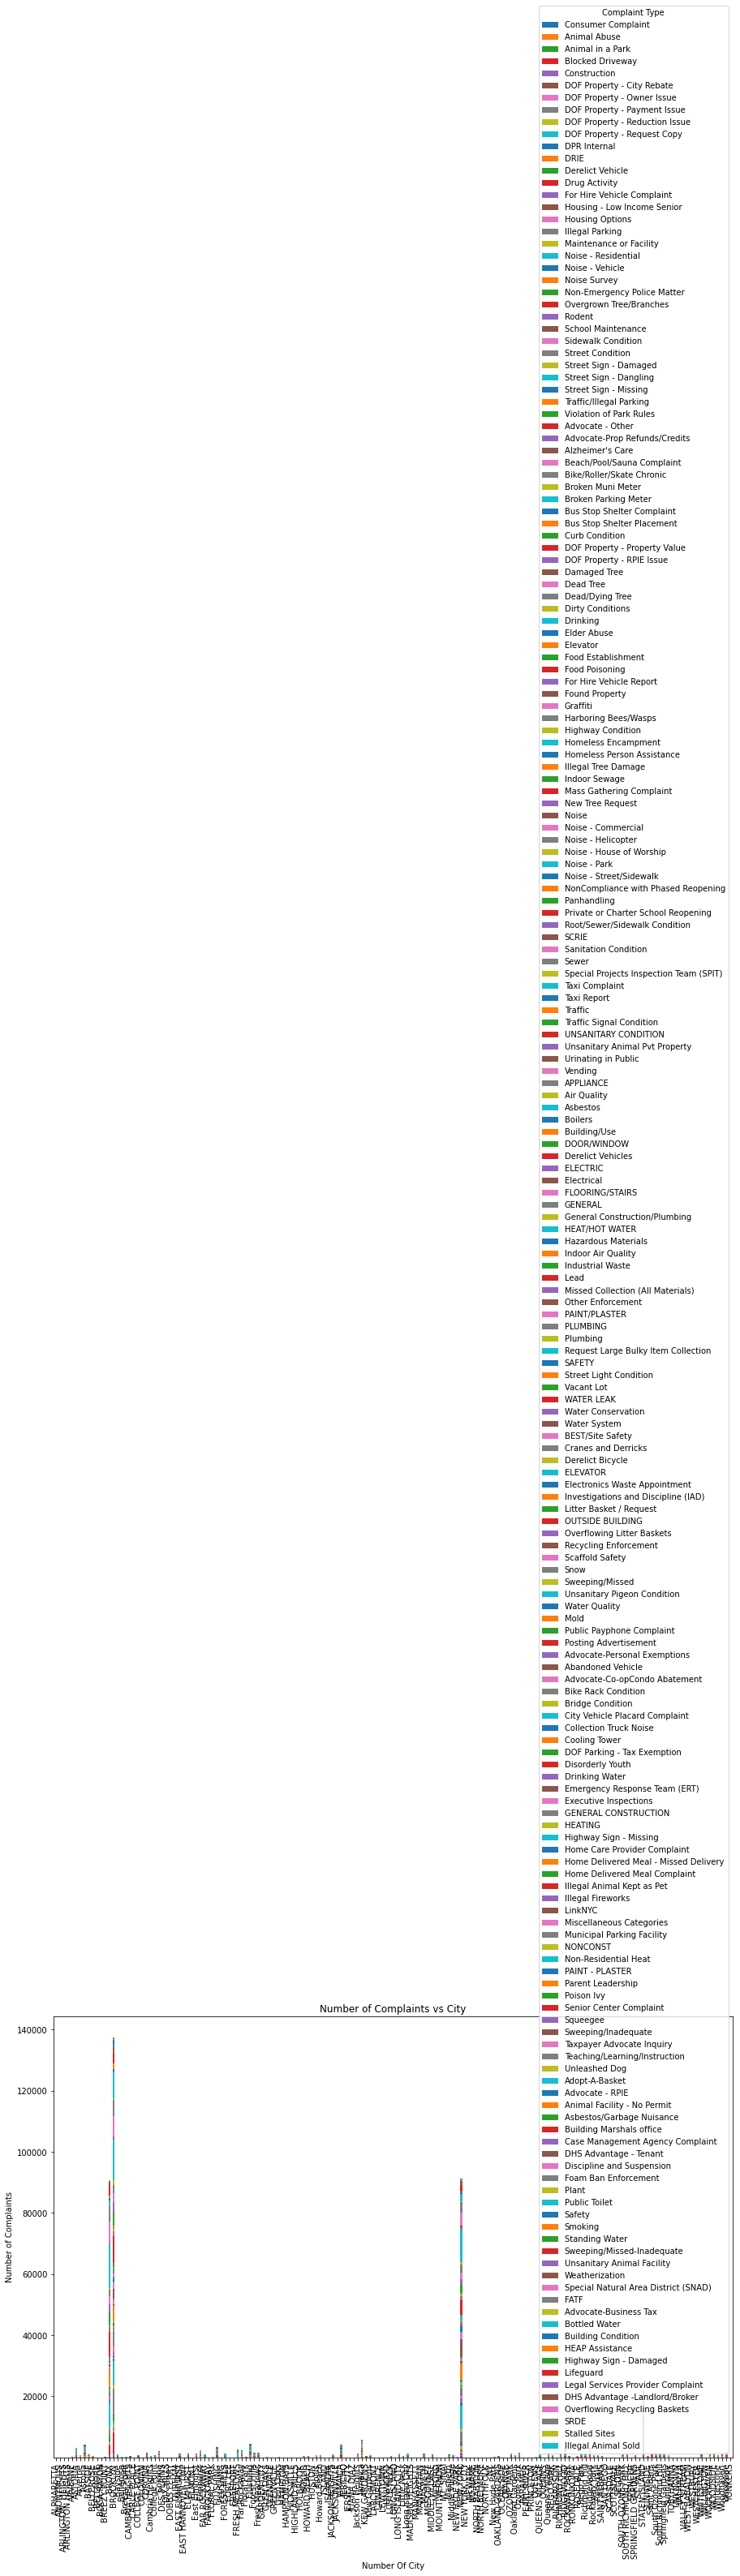

In [42]:
da1.plot.bar(figsize=(15,10), stacked=True)
plt.xlabel('Number Of City')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints vs City')

## Check If The Average Response Time Across Various Types Of Complaints

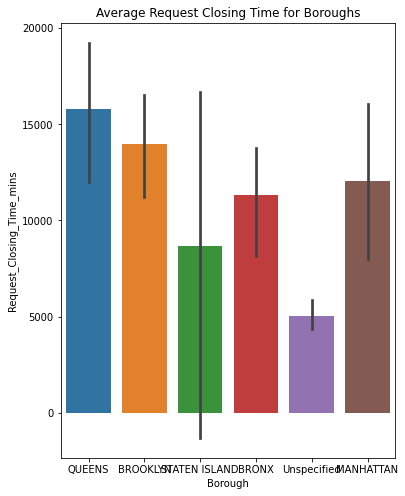

In [44]:
#Average response time of a complaint was observed for different Boroughs
plt.figure(figsize=(6,8))
sns.barplot(x='Borough', y='Request_Closing_Time_mins', data=customer_file)
plt.title('Average Request Closing Time for Boroughs')
plt.show()